# Striplogs from point data

This notebooks looks at the main `striplog` object. For the basic objects it depends on, see [Basic objects](./Basic_objects.ipynb).

First, import anything we might need.

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

import striplog
striplog.__version__

'0.7.0'

In [2]:
from striplog import Legend, Lexicon, Interval, Component

In [3]:
legend = Legend.builtin('NSDOE')
lexicon = Lexicon.default()

<hr />
## Making a `striplog`

In [4]:
from striplog import Striplog
imgfile = "data/images/M-MG-70_14.3_135.9.png"

In [5]:
strip = Striplog.from_image(imgfile, 14.3, 135.9, legend=legend)
strip

Striplog(26 Intervals, start=14.3, stop=135.9)

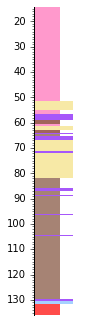

In [6]:
strip.plot(legend, ladder=True, aspect=3)

<hr />
## Handling tops

I recommend treating tops as intervals, not as point data. This is the default.

Note the magic word `Comp` (or `Component`) to load as a component, rather than data — it's up to you what you prefer.

Note also that these are out of order; they will be sorted. 

In [7]:
tops_csv = """top, Comp formation
100, Escanilla Fm.
350, San Vicente Fm.
200, Sobrarbe Fm. 
500, Cretaceous
"""

In [8]:
tops = Striplog.from_csv(text=tops_csv)

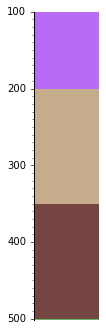

In [9]:
tops.plot(aspect=3)

In [10]:
tops.order

'depth'

<hr />
## Handling point data

Some things really are point data. Sort of like a log, but irregular, more discrete. Here are some lab measurements... 

In [11]:
data_csv = """top, density, porosity, remarks, comp lithology, comp colour
30, 2300, 6.4,, sand,green
40, 2375, 7.3,, shale, grey
60, 2400, 8.2, broken sample,,
70, 2425, 9.2,, sand, 
80, 2575, 4.3,, shale,
90, 2600, 2.2,, sand, red
93, 2230, 2.1,, sand, 
"""

In [12]:
point_data = Striplog.from_csv(text=data_csv, points=True)

In [13]:
point_data[1]

Interval({'top': Position({'units': 'm', 'middle': 40.0}), 'data': {'remarks': '', 'density': 2375.0, 'porosity': 7.3}, 'components': [Component({'colour': 'grey', 'lithology': 'shale'})], 'description': '', 'base': Position({'units': 'm', 'middle': 40.0})})

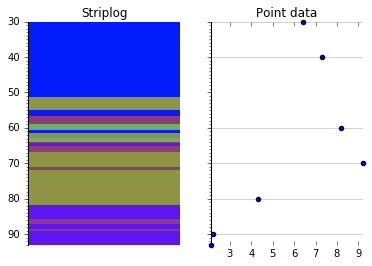

In [14]:
fig, (ax0, ax1) = plt.subplots(1, 2, sharey=True)
ax0 = strip.plot(ax=ax0)
ax1 = point_data.plot(field='porosity', ax=ax1)

ax0.set_title('Striplog')
ax1.set_title('Point data')

plt.show()

In [15]:
s = strip.union(point_data)

In [16]:
s[0]

Interval({'top': Position({'units': 'm', 'middle': 14.3}), 'data': {'remarks': ['', ''], 'density': [2300.0, 2375.0], 'porosity': [6.4, 7.3]}, 'components': [Component({'grainsize': '', 'lithology': 'anhydrite', 'colour': ''}), Component({'colour': 'green', 'lithology': 'sand'}), Component({'colour': 'grey', 'lithology': 'shale'})], 'description': '100.0% 100.0% 36.94 m of anhydrite with 0.0% 0.00 m of green, sand with 0.0% 0.00 m of grey, shale', 'base': Position({'units': 'm', 'middle': 51.24117647058824})})

## A more complicated example

In [19]:
fname = "data/xrf/XRF_sample.csv"

remap = {'rocktype': 'Comp Lithology'}
ignore = ['date', 'project', 'index', 'name', 'sname', 'station']

xrf = Striplog.from_csv(fname, remap=remap, ignore=ignore, null='ND')

In [20]:
xrf[4]

Interval({'top': Position({'units': 'm', 'middle': 50.0}), 'data': {'Sn': 19.0, 'Y': 31.0, 'La': 113.0, 'Sm': 18.0, 'Mo': 1.0, 'Fe': 47737.0, 'Co': 19.0, 'Mn': 678.0, 'P': 2730.0, 'S': 789.0, 'Cl': 1564.0, 'Zr': 167.0, 'Zn': 62.0, 'Th': 49.0, 'Nb': 17.0, 'Cd': 4.0, 'Rb': 49.0, 'Ti': 6873.0, 'Bi': 5.0, 'Sr': 47.0, 'K': 10797.0, 'Ag': 1.0, 'Cu': 24.0, 'Cr': 59.0, 'Ca': 4854.0, 'Ba': 186.0, 'Hg': 5.0, 'V': 104.0, 'Sb': 1.0, 'U': 3.0, 'As': 11.0, 'Ce': 130.0}, 'components': [Component({'Lithology': 'sandstone'})], 'description': '', 'base': Position({'units': 'm', 'middle': 60.0})})

## Another more complicated one

In [22]:
fname = 'data/tops/Helen_top.csv'

# What to include: only rows with Well = P-108
include= {'Well identifier': lambda x: x=='P-108'}

# Rename the Surface field as Name.
remap = {'Surface': 'Name'}

# What to exclude: any rows with Name = TD
exclude = {'Name': lambda x: x=='TD'}

# What to transform before using: make Z positive and correct a spelling error.
function = {'Z': lambda x: -x,
            'Name': lambda x: x.replace('Maguma', 'Meguma')}

# Which fields to leave out of the result, apart from those that are Null.
ignore = ['Edited by user', 'Locked to fault', 'Used by dep.conv.', 'Well', 'Symbol']

# Do the thing!
s = Striplog.from_csv(fname,
                      include=include,
                      exclude=exclude,
                      remap=remap,
                      ignore=ignore,
                      function=function,
                      points=False,
                      null=-999.0
                      )

In [23]:
s

Striplog(4 Intervals, start=465.0, stop=1175.0)

## The same thing from Petrel's own format

In [25]:
fname = 'data/tops/Helen_top.txt'

# What to include: only rows with Well = P-108
include= {'Well': lambda x: x=='P-108'}

# Rename the Surface field as Name.
remap = {'Surface': 'Name'}

# What to exclude: any rows with Name = TD
exclude = {'Name': lambda x: x=='TD'}

# What to transform before using: make Z positive and correct a spelling error.
function = {'Z': lambda x: -x,
            'Name': lambda x: x.replace('Maguma', 'Meguma')}

# Which fields to leave out of the result, apart from those that are Null.
ignore = ['Edited by user', 'Locked to fault', 'Used by dep.conv.', 'Well', 'Symbol']

# Do the thing!
s = Striplog.from_petrel(fname,
                         include=include,
                         exclude=exclude,
                         remap=remap,
                         ignore=ignore,
                         function=function,
                         points=False,
                         null=-999.0
                         )

In [26]:
s

Striplog(4 Intervals, start=465.0, stop=1175.0)

In [27]:
s[3]

Interval({'top': Position({'units': 'm', 'middle': 1055.0}), 'data': {'Type': 'Other', 'Used by geo mod': True, 'Y': 5004321.0, 'Interpreter': 'cenx', 'Z': 1001.35, 'X': 478677.0, 'Name': 'Meguma'}, 'components': [], 'description': '', 'base': Position({'units': 'm', 'middle': 1175.0})})